In [1]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import matplotlib.pyplot as plt

from data.dataLoader import ClientPreprocessTrain, ClientPreprocessTest, GlobalPreprocess
from data.distribution import data_label_distribution
from globle.trainer.trainer import GlobalTrainer
from globle.trainer.evaluator import GlobalEvaluator
from client.trainer.trainer import ClientTrainer
from client.trainer.evaluator import ClientEvaluator
from models.models import model
from configs.confLoader import *

digits	count
2:	1
3:	3
4:	1
5:	2
6:	3
7:	2
8:	2
9:	2
torch.Size([16, 1, 28, 28])


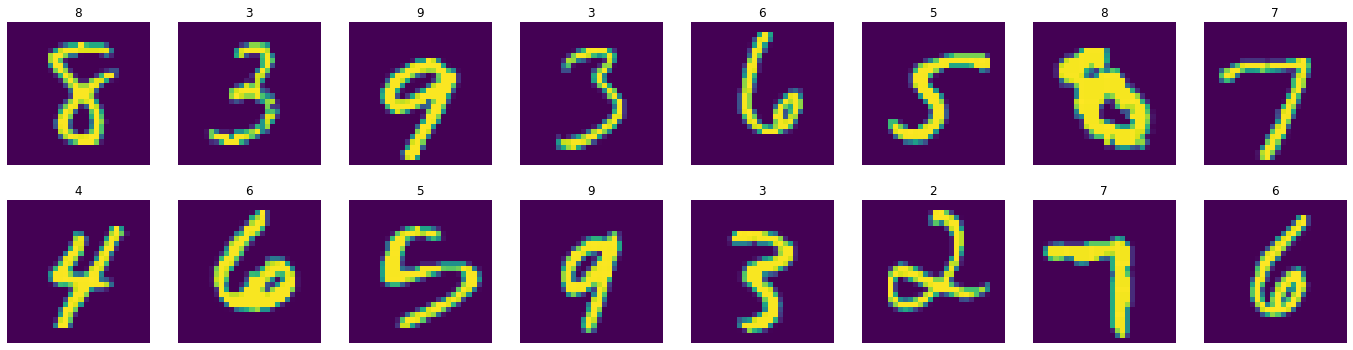

In [2]:
client_test = ClientPreprocessTest()
data, target = next(iter(client_test[0]))
label_count = (torch.unique(target, return_counts=True))
print('digits\tcount')
for label, count in zip(label_count[0], label_count[1]):
    print(int(label), ':\t', int(count), sep='')
print(data.shape)
# data = transforms.ToPILImage(data.squeeze())
fig = plt.figure(figsize=(24, 6))
for i in range(len(target)):
    fig.add_subplot(2, 8, (i+1))
    plt.imshow(data[i].squeeze())
    plt.axis('off')
    plt.title(int(target[i]))


In [3]:
global_model = model
print(global_model)

ClassicCNN(
  (net): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
    (5): Linear(in_features=1024, out_features=512, bias=True)
    (6): ReLU(inplace=True)
    (7): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [4]:
global_trainer = GlobalTrainer(global_model)

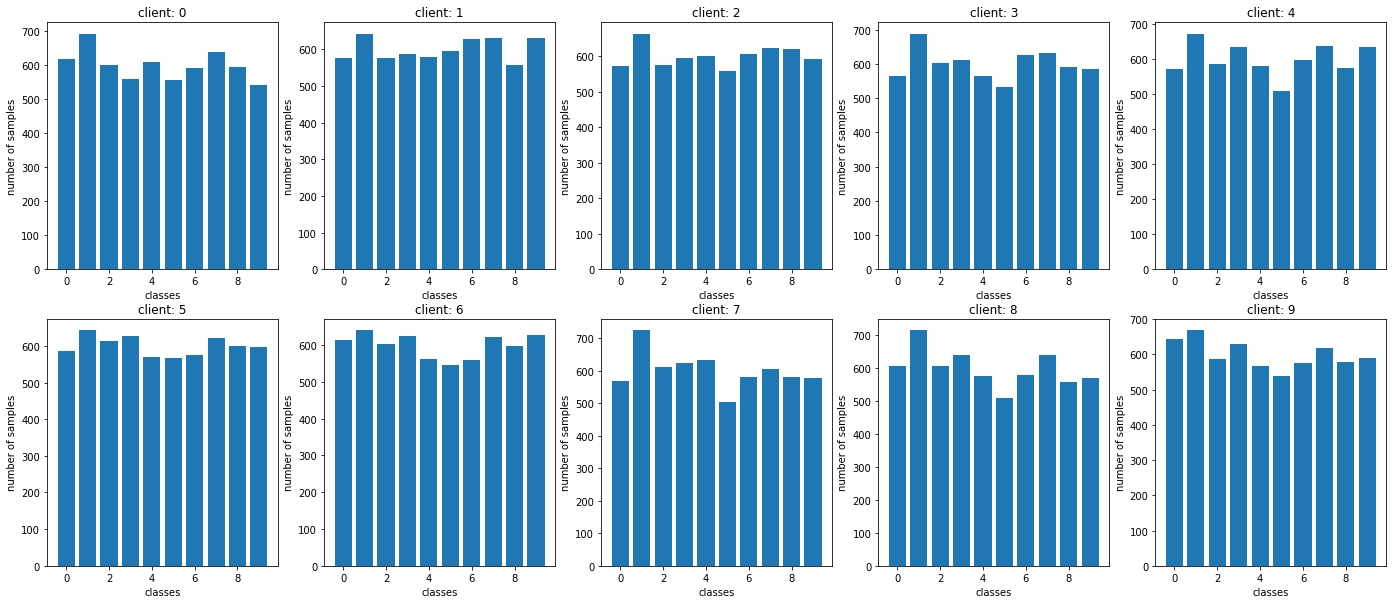

In [5]:
fig = plt.figure(figsize=(24, 10))
for i in range(n_clients):
    fig.add_subplot(2, int(n_clients/2), (i+1))
    distribution = data_label_distribution(global_trainer.trainset[i])
    plt.bar(distribution.keys(), distribution.values())
    plt.title(f'client: {i}')
    plt.xlabel('classes')
    plt.ylabel('number of samples')


In [6]:
global_trainer.train()

global_training_epoch:   0%|          | 0/30 [00:00<?, ?it/s]

3


global_training_epoch:   3%|▎         | 1/30 [00:01<00:30,  1.04s/it]

3


global_training_epoch:   7%|▋         | 2/30 [00:02<00:28,  1.01s/it]

3


global_training_epoch:  10%|█         | 3/30 [00:03<00:27,  1.01s/it]

3


global_training_epoch:  13%|█▎        | 4/30 [00:04<00:29,  1.12s/it]

3


global_training_epoch:  17%|█▋        | 5/30 [00:05<00:27,  1.10s/it]

3


global_training_epoch:  20%|██        | 6/30 [00:06<00:27,  1.14s/it]

3


global_training_epoch:  23%|██▎       | 7/30 [00:07<00:27,  1.19s/it]

3


global_training_epoch:  27%|██▋       | 8/30 [00:09<00:26,  1.21s/it]

3


global_training_epoch:  30%|███       | 9/30 [00:10<00:25,  1.19s/it]

3


global_training_epoch:  33%|███▎      | 10/30 [00:11<00:24,  1.24s/it]

3


global_training_epoch:  37%|███▋      | 11/30 [00:12<00:22,  1.19s/it]

3


global_training_epoch:  40%|████      | 12/30 [00:13<00:20,  1.15s/it]

3


global_training_epoch:  43%|████▎     | 13/30 [00:14<00:19,  1.14s/it]

3


global_training_epoch:  47%|████▋     | 14/30 [00:16<00:18,  1.14s/it]

3


global_training_epoch:  50%|█████     | 15/30 [00:17<00:16,  1.12s/it]

3


global_training_epoch:  53%|█████▎    | 16/30 [00:18<00:15,  1.11s/it]

3


global_training_epoch:  57%|█████▋    | 17/30 [00:19<00:14,  1.12s/it]

3


global_training_epoch:  60%|██████    | 18/30 [00:20<00:13,  1.13s/it]

3


global_training_epoch:  63%|██████▎   | 19/30 [00:21<00:12,  1.10s/it]

3


global_training_epoch:  67%|██████▋   | 20/30 [00:22<00:10,  1.08s/it]

3


global_training_epoch:  70%|███████   | 21/30 [00:23<00:09,  1.09s/it]

3


global_training_epoch:  73%|███████▎  | 22/30 [00:24<00:08,  1.09s/it]

3


global_training_epoch:  77%|███████▋  | 23/30 [00:25<00:07,  1.10s/it]

3


global_training_epoch:  80%|████████  | 24/30 [00:26<00:06,  1.08s/it]

3


global_training_epoch:  83%|████████▎ | 25/30 [00:28<00:05,  1.08s/it]

3


global_training_epoch:  87%|████████▋ | 26/30 [00:29<00:04,  1.08s/it]

3


global_training_epoch:  90%|█████████ | 27/30 [00:30<00:03,  1.16s/it]

3


global_training_epoch:  93%|█████████▎| 28/30 [00:31<00:02,  1.14s/it]

3


global_training_epoch:  97%|█████████▋| 29/30 [00:32<00:01,  1.12s/it]

3


global_training_epoch: 100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


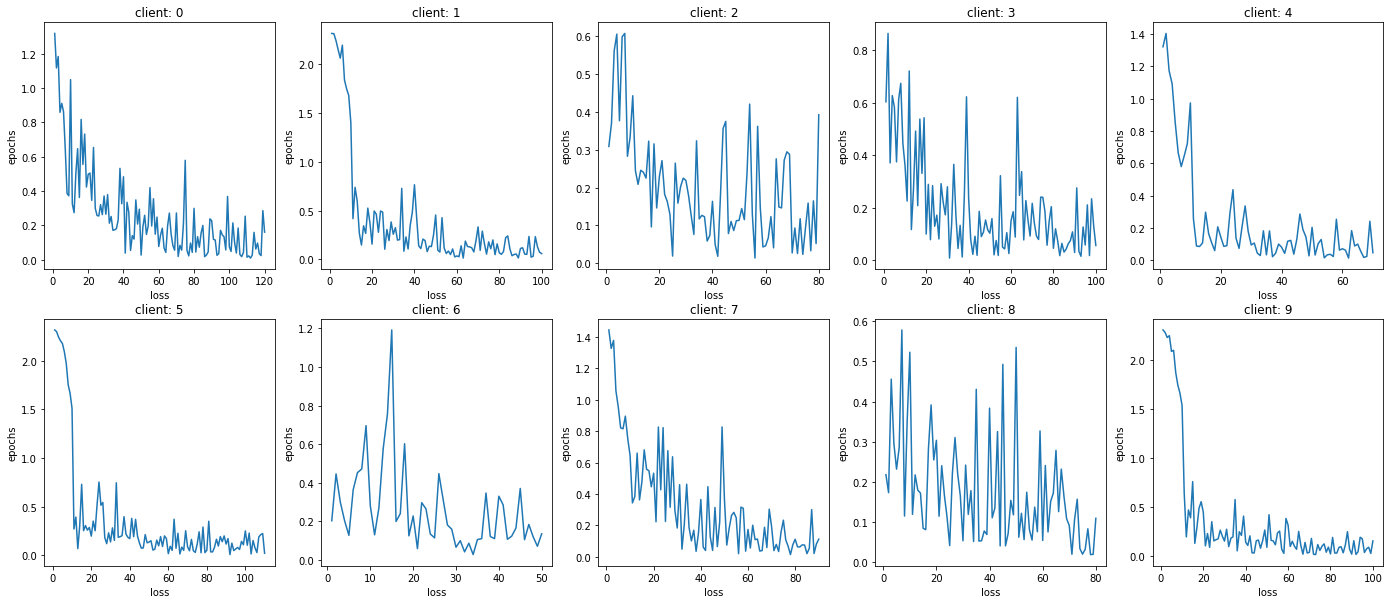

In [7]:
fig = plt.figure(figsize=(24, 10))
for i in range(n_clients):
    fig.add_subplot(2, int(n_clients/2), (i+1))
    X = global_trainer.client_trainer_set[i].loss_history
    Y = [i+1 for i in range(len(X))]
    plt.plot(Y, X)
    plt.title(f'client: {i}')
    plt.xlabel('loss')
    plt.ylabel('epochs')

In [8]:
global_test = GlobalPreprocess()

client_evaluator_set = [ClientEvaluator(i, global_model, client_test[i]) for i in range(n_clients)]
global_evaluator = GlobalEvaluator(global_model, global_test)

In [9]:
avg_client_acc = 0
avg_client_loss = 0
avg_client_conf_mat = torch.zeros([10, 10])  
  
for i in range(n_clients):
    client_evaluator_set[i].test()
    avg_client_acc += client_evaluator_set[i].accuracy
    avg_client_loss += client_evaluator_set[i].loss
    print(type(client_evaluator_set[i].conf_mat), type(avg_client_conf_mat))
    avg_client_conf_mat = torch.add(avg_client_conf_mat, client_evaluator_set[i].conf_mat)
    
avg_client_acc /= n_clients
avg_client_loss /= n_clients
avg_client_conf_mat  = torch.div(avg_client_conf_mat, n_clients)
    

client [0]: 100%|██████████| 63/63 [00:00<00:00, 73.87it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [1]: 100%|██████████| 63/63 [00:00<00:00, 77.43it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [2]: 100%|██████████| 63/63 [00:00<00:00, 100.03it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [3]: 100%|██████████| 63/63 [00:00<00:00, 104.41it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [4]: 100%|██████████| 63/63 [00:00<00:00, 101.85it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [5]: 100%|██████████| 63/63 [00:00<00:00, 63.21it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [6]: 100%|██████████| 63/63 [00:00<00:00, 67.11it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [7]: 100%|██████████| 63/63 [00:00<00:00, 84.72it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [8]: 100%|██████████| 63/63 [00:00<00:00, 80.33it/s]


<class 'torch.Tensor'> <class 'torch.Tensor'>


client [9]: 100%|██████████| 63/63 [00:01<00:00, 60.90it/s]

<class 'torch.Tensor'> <class 'torch.Tensor'>


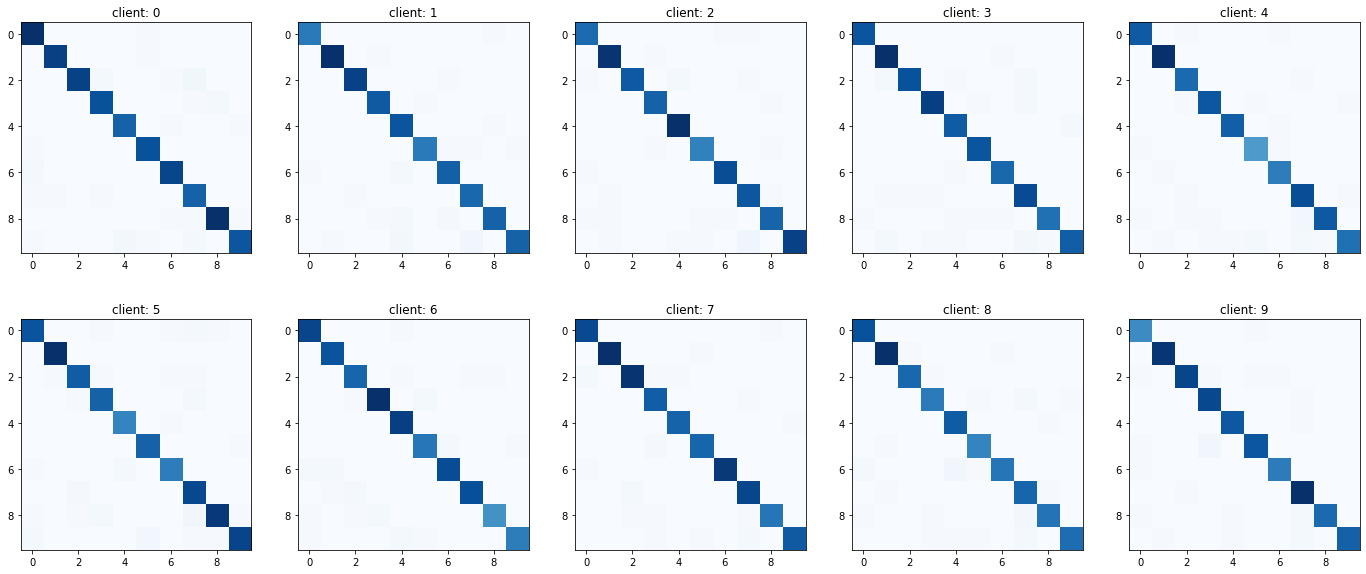

In [10]:
fig = plt.figure(figsize=(24, 10))
for i in range(n_clients):
    fig.add_subplot(2, int(n_clients/2), (i+1))
    plt.imshow(client_evaluator_set[i].conf_mat, cmap='Blues')
    plt.title(f'client: {i}')


<BarContainer object of 10 artists>

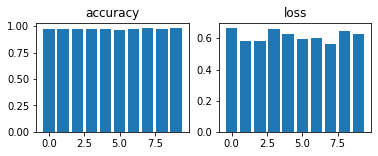

In [11]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.bar([i for i in range(n_clients)], [client_evaluator_set[i].accuracy for i in range(n_clients)])
plt.title('accuracy')
fig.add_subplot(1, 2, 2)
plt.title('loss')   
plt.bar([i for i in range(n_clients)], [client_evaluator_set[i].loss for i in range(n_clients)])


In [12]:
global_evaluator.test()

global_evaluation: 100%|██████████| 157/157 [00:05<00:00, 28.20it/s]


Text(0.5, 1.0, 'clieint average')

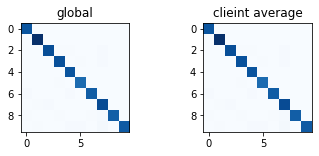

In [13]:
fig = plt.figure(figsize=(6, 2))
fig.add_subplot(1, 2, 1)
plt.imshow(global_evaluator.conf_mat, cmap='Blues')
plt.title('global')
fig.add_subplot(1, 2, 2)
plt.imshow(avg_client_conf_mat, cmap='Blues')
plt.title('clieint average')


In [14]:
print('Global Accuracy', global_evaluator.accuracy, '\tClient avg Accuracy', avg_client_acc)
print('Global Loss' , global_evaluator.loss, '\tClient avg Loss', avg_client_loss)

Global Accuracy 0.9738256369426752 	Client avg Accuracy 0.9735119047619047
Global Loss 0.6161316371837886 	Client avg Loss 0.6154753039994637
